In [2]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [14]:
import sqlite3


path = "C:/Users/user/PycharmProjects/py-restaurant-data-analysis/db.sqlite3"
conn = sqlite3.connect(path)

# SQL query to join the three tables
query = """
SELECT 
    o.id AS Order_id, 
    o.datetime AS Datetime, 
    oi.quantity AS Quantity, 
    p.name AS Product_name, 
    p.price AS Price
FROM 
    restaurant_orderitem oi 
JOIN 
    restaurant_order o ON oi.order_id = o.id 
JOIN 
    restaurant_product p ON oi.product_id = p.id
"""

combined_df = pd.read_sql_query(query, conn)
combined_df.to_csv("restaurant_combined.csv", index=False)

conn.close()

combined_df.head()

,Order_id,Datetime,Quantity,Product_name,Price
0,1,2019-08-03 20:25:00,2,Plain Papadum,0.80
1,1,2019-08-03 20:25:00,1,King Prawn Balti,12.95
2,1,2019-08-03 20:25:00,1,Garlic Naan,2.95
3,1,2019-08-03 20:25:00,1,Mushroom Rice,3.95
4,1,2019-08-03 20:25:00,1,Paneer Tikka Masala,8.95


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

,Product_name,Order_id,Datetime,Quantity,Price,Percentage
52,Chicken Tikka Masala,12331599,2019-08-03 19:42:002019-08-03 19:26:002019-08-...,2473,19090.35,9.523993
186,Pilau Rice,26677246,2019-08-03 20:01:002019-08-03 19:42:002019-08-...,6367,13926.95,24.520527
97,Korma,7902804,2018-04-21 21:24:002018-04-21 20:24:002018-04-...,1370,10748.95,5.276130
16,Bombay Aloo,10089507,2019-08-03 19:26:002019-08-03 18:36:002019-08-...,1831,10424.40,7.051529
187,Plain Naan,18779066,2019-08-03 20:17:002019-08-03 19:28:002019-08-...,4983,9757.80,19.190480
20,Butter Chicken,6052473,2019-08-01 20:42:002019-07-31 19:54:002019-07-...,1068,9751.00,4.113071
165,Onion Bhajee,14266367,2019-08-03 19:25:002019-08-03 19:16:002019-08-...,2749,9487.90,10.586921
98,Korma - Chicken,4888301,2019-08-03 19:25:002019-08-03 19:16:002019-08-...,1091,8439.85,4.201648
231,Tandoori Mixed Grill,4513586,2019-08-03 18:00:002019-08-02 11:35:002019-07-...,716,7958.70,2.757452
81,Garlic Naan,17297252,2019-08-03 20:25:002019-08-03 19:28:002019-08-...,3318,7752.60,12.778248


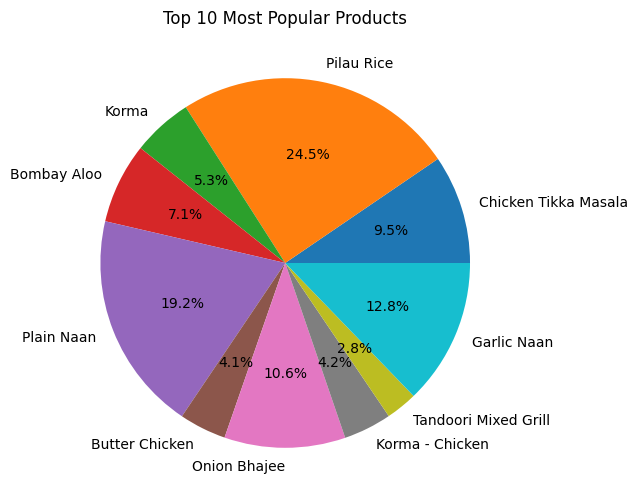

In [19]:
import matplotlib.pyplot as plt


product_sales = combined_df.groupby("Product_name").sum().reset_index()
top_10 = product_sales.sort_values(by="Price", ascending=False)[:10]
top_10["Percentage"] = (top_10["Quantity"] / top_10["Quantity"].sum()) * 100

plt.figure(figsize=(10, 6))
plt.pie(top_10["Quantity"], labels=top_10["Product_name"], autopct="%1.1f%%")
plt.title("Top 10 Most Popular Products")

top_10.head(10)

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

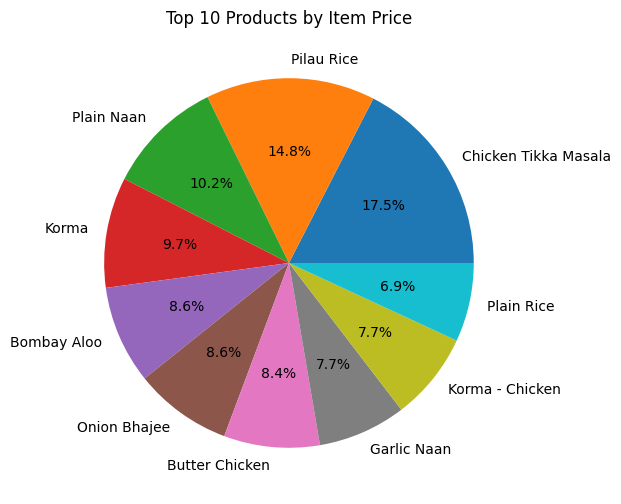

In [25]:
combined_df["Item_Price"] = combined_df["Price"] * combined_df["Quantity"]
products_to_show = combined_df.groupby("Product_name")["Item_Price"].sum().reset_index()
top_10 = products_to_show.sort_values(by="Item_Price", ascending=False)[:10]
top_10["Percentage"] = (top_10["Item_Price"] / top_10["Item_Price"].sum()) * 100

plt.figure(figsize=(10, 6))
plt.pie(top_10["Item_Price"], labels=top_10["Product_name"], autopct="%1.1f%%")
plt.title("Top 10 Products by Item Price")

plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

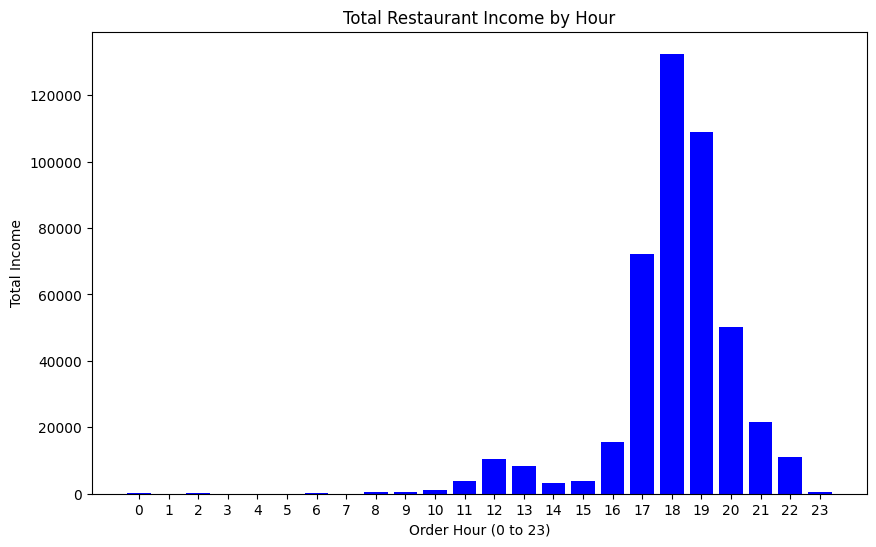

In [27]:
combined_df["Order_Datetime"] = pd.to_datetime(combined_df["Datetime"])
combined_df["Order_Hour"] = combined_df["Order_Datetime"].dt.hour
combined_df["Item_Price"] = combined_df["Price"] * combined_df["Quantity"]
hourly_price = combined_df.groupby("Order_Hour")["Item_Price"].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(hourly_price["Order_Hour"], hourly_price["Item_Price"], color="blue")
plt.xlabel('Order Hour (0 to 23)')
plt.ylabel('Total Income')
plt.title('Total Restaurant Income by Hour')

plt.xticks(range(24))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

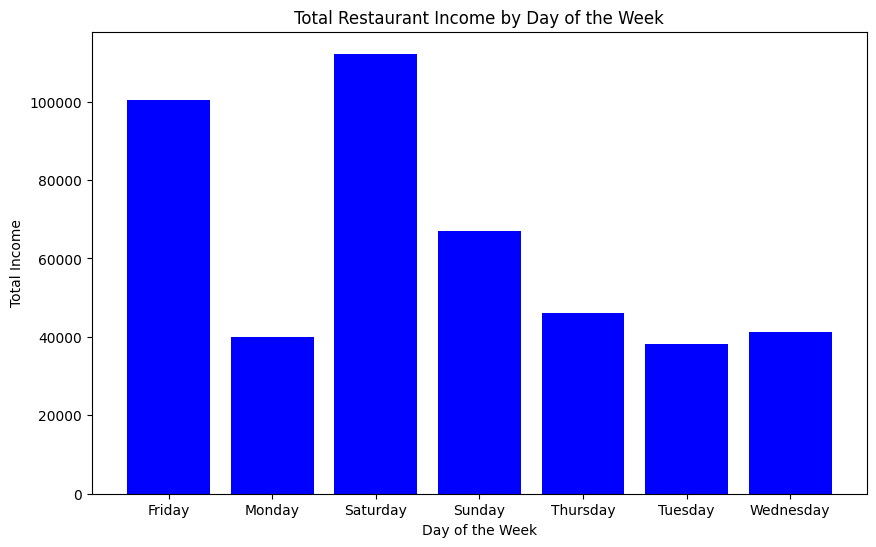

In [28]:
combined_df["Order_Datetime"] = pd.to_datetime(combined_df["Datetime"])
combined_df["Order_DayOfWeek"] = combined_df["Order_Datetime"].dt.dayofweek

DAYS_MAPPING = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}

combined_df["Order_DayOfWeek"] = combined_df["Order_DayOfWeek"].map(DAYS_MAPPING)
days_price = combined_df.groupby("Order_DayOfWeek")["Item_Price"].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(days_price["Order_DayOfWeek"], days_price["Item_Price"], color="blue")
plt.xlabel('Day of the Week')
plt.ylabel('Total Income')
plt.title('Total Restaurant Income by Day of the Week')
plt.show()
